In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (7, 4)

In [3]:
cd ../..

/home/ben/masterphase/Mastercode


In [4]:
from helper.ExcludeAnalyzer import ExcludeAnalyzer

### Get data from exclude_data/ directory

In [5]:
analyzer = ExcludeAnalyzer("data/exclude_data/huge_PNN_std",
                         exclude_outliers=True,
                         select_slice=None)

### Response curves when excluding training data

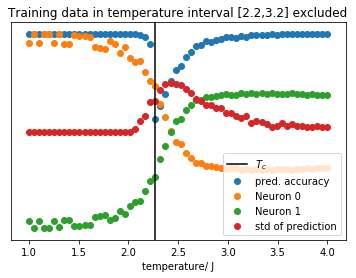

In [47]:
graphs = analyzer.T_curve(slice(175,176), display_std=True, display_response=True)

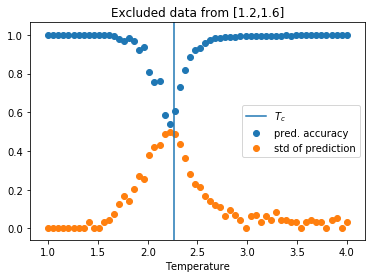

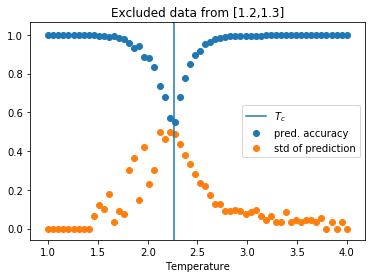

In [16]:
graphs = analyzer.T_curve(slice(0,10), display_std=True, display_response=False)

### Create shift image

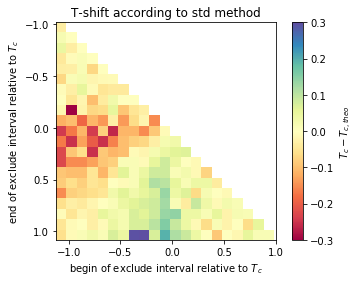

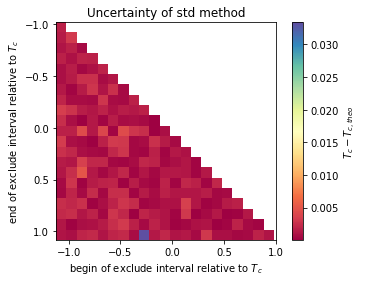

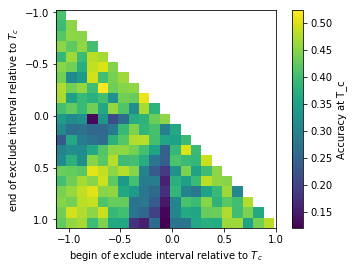

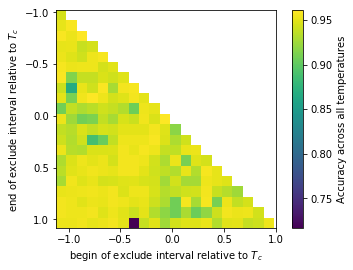

In [43]:
_ =analyzer.shift_images(display_shift=False)

## Debug: look at accuracy curves of points with high shift

In [16]:
indices = np.argsort(t_shift)
np.sort(t_shift)[:10]

array([-0.65883174, -0.63340805, -0.63340805, -0.63340805, -0.63340805,
       -0.60798437, -0.47239144, -0.13340756, -0.1164592 , -0.1164592 ])

(2, 60, 4)
(2, 60, 4)
(2, 60, 4)
(2, 60, 4)
(2, 60, 4)
(2, 60, 4)


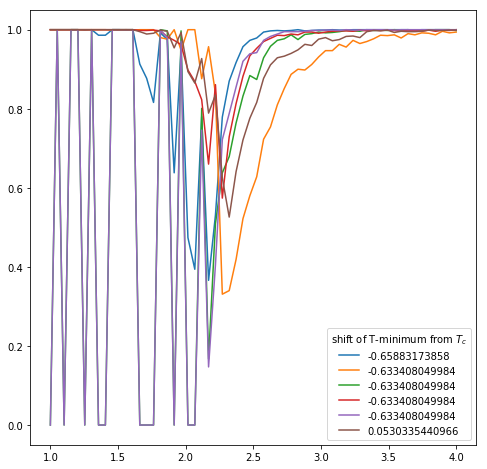

In [17]:
for i in np.hstack((indices[:5], indices[-1:])):
    print(np.shape(results[i]))
    plt.plot(results[i][0,:,0], results[i][0,:,1], label=t_shift[i])
plt.legend(title="shift of T-minimum from $T_c$")

Well, obviously the networks at these points did not converge, more statistics will cause these points to vanish as another instantiation of the same network is likely to converge.

In [ ]:
i = indices[0]
for j in range(np.shape(results[i])[0]):
    plt.plot(results[i][j,:,0], results[i][j,:,1], label=t_shift[i])
    
plt.show()
    
plt.plot(results[i][0,:,0], np.mean(results[i][:,:,1], axis=0))

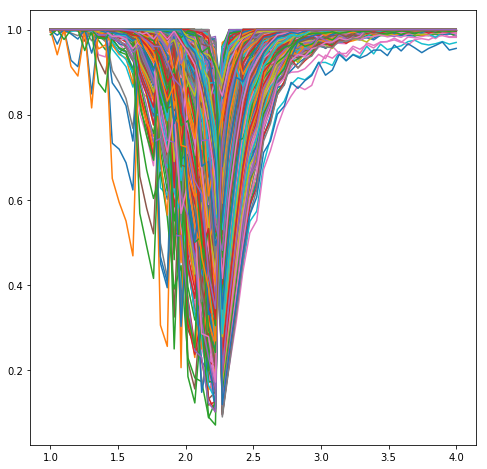

In [8]:
T = results[0][0,:,0]
curve = np.zeros(len(results[0][0,:,1]))
for i in range(len(results)):
    curve = curve + np.sum(results[i][:,:,1], axis=0)
    for p in range(np.shape(results[i])[0]):
        plt.plot(T, results[i][p,:,1])
    
total_points = sum([np.shape(r)[0] for r in results])
curve = curve/total_points

In [ ]:
T[np.argmin(curve)]

In [ ]:
plt.scatter(T, curve)
plt.axvline(2.269, c='red')
plt.xlabel("Temperature")
plt.ylabel("Accuracy")